In [1]:
import tensorflow as tf
import numpy as np
import sys
sys.path.append("..") # Adds higher directory to python modules path.
import branchingdnn as branching
from branchingdnn.utils import * 

In [57]:
# x = tf.keras.models.load_model('../models/alexNetv6_compress.hdf5', custom_objects={'confidenceScore': confidenceScore,
#                                                                          'unconfidence': unconfidence,
#                                                                          'confidenceDifference': confidenceDifference,
#                                                                          'BranchEndpoint': branching.branches.branch.BranchEndpoint,
#                                                                          'FeatureDistillation': branching.branches.branch.FeatureDistillation})

In [58]:
# x.compile(optimizer=tf.optimizers.SGD(lr=0.001), loss='SparseCategoricalCrossentropy', metrics=['accuracy',confidenceDifference],run_eagerly=True)
# train_ds, test_ds, validation_ds = normal_dataset
# x.evaluate(test_ds, verbose=2)

In [59]:
# x = tf.keras.models.load_model('../models/alexNetv6_feat_distill_4.hdf5', custom_objects={'confidenceScore': confidenceScore,
#                                                                          'unconfidence': unconfidence,
#                                                                          'confidenceDifference': confidenceDifference,
#                                                                          'BranchEndpoint': branching.branches.branch.BranchEndpoint,
#                                                                          'FeatureDistillation': branching.branches.branch.FeatureDistillation,
#                                                                          'FeatureDistillation_clear': branching.branches.branch.FeatureDistillation_clear})

In [ ]:
# if not dataset:
dataset = branching.dataset.prepare.dataset_distil(tf.keras.datasets.cifar10.load_data(),32,5000,22500,(227,227))

In [ ]:
x.compile(optimizer=tf.optimizers.SGD(lr=0.001), loss='SparseCategoricalCrossentropy', metrics=['accuracy',confidenceDifference],run_eagerly=True)

In [3]:
# train_ds, test_ds, validation_ds = dataset
# x.evaluate(test_ds, verbose=2)

baseline: 
312/312 - 19s - loss: 3.6760 - dense_2_loss: 0.6242 - branch_softmax_loss: 1.3435 - branch_softmax_1_loss: 1.0038 - branch_softmax_2_loss: 0.7045 - dense_2_accuracy: 0.7948 - dense_2_confidenceDifference: 0.0955 - branch_softmax_accuracy: 0.6202 - branch_softmax_confidenceDifference: 0.0610 - branch_softmax_1_accuracy: 0.7387 - branch_softmax_1_confidenceDifference: 0.0632 - branch_softmax_2_accuracy: 0.8073 - branch_softmax_2_confidenceDifference: 0.0773

feature_distil 1 results:

312/312 - 19s - loss: 106350.4688 - dense_2_loss: 0.6242 - branch_softmax_loss: 1.0999 - dense_2_accuracy: 0.7948 - dense_2_confidenceDifference: 0.0955 - branch_softmax_accuracy: 0.6580 - branch_softmax_confidenceDifference: 0.0683 - branch_teaching_distill: 106347.7500 - branch_softmax_KL: 0.9727

number 2 results:
312/312 - 19s - loss: 106322.7031 - dense_2_loss: 0.6242 - branch_softmax_loss: 1.2637 - dense_2_accuracy: 0.7948 - dense_2_confidenceDifference: 0.0955 - branch_softmax_accuracy: 0.6382 - branch_softmax_confidenceDifference: 0.0631 - branch_teaching_distill: 106319.7344 - branch_softmax_KL: 1.0670


number 3 results:
312/312 - 29s - loss: 166223.5781 - dense_2_loss: 0.6242 - branch_softmax_loss: 1.1222 - branch_softmax_1_loss: 0.8409 - branch_softmax_2_loss: 0.6892 - dense_2_accuracy: 0.7948 - dense_2_confidenceDifference: 0.0955 - branch_softmax_accuracy: 0.6825 - branch_softmax_confidenceDifference: 0.0667 - branch_softmax_1_accuracy: 0.7635 - branch_softmax_1_confidenceDifference: 0.0700 - branch_softmax_2_accuracy: 0.8064 - branch_softmax_2_confidenceDifference: 0.0775 - branch_teaching_distill: 104909.4453 - branch_teaching_1_distill: 61309.5430 - branch_softmax_KL: 0.8163 - branch_softmax_1_KL: 0.3491 - branch_softmax_2_KL: 0.0748

bottleneck only:
312/312 - 28s - loss: 4.8280 - dense_2_loss: 0.6242 - branch_softmax_loss: 1.0523 - branch_softmax_1_loss: 0.9956 - branch_softmax_2_loss: 0.6793 - dense_2_accuracy: 0.7948 - dense_2_confidenceDifference: 0.0955 - branch_softmax_accuracy: 0.6842 - branch_softmax_confidenceDifference: 0.0681 - branch_softmax_1_accuracy: 0.7487 - branch_softmax_1_confidenceDifference: 0.0630 - branch_softmax_2_accuracy: 0.8060 - branch_softmax_2_confidenceDifference: 0.0803 - branch_softmax_KL: 0.9346 - branch_softmax_1_KL: 0.4687 - branch_softmax_2_KL: 0.0733

In [43]:
branches = 1
teaching_features = [1,2,3,4]
if type(teaching_features) is not list:
    teaching_features = [teaching_features]
print(teaching_features)
print(min(branches, len(teaching_features)))
y = teaching_features[min(branches, len(teaching_features))]
y

[1, 2, 3, 4]
1


2

In [2]:
# Download MNIST dataset
# mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
# print(y_train)
K= 10 # number of classes

train_labels = tf.keras.utils.to_categorical(train_labels,10)
test_labels = tf.keras.utils.to_categorical(test_labels,10)

validation_size = 5000
shuffle_size = 22500
batch_size=32
validation_images, validation_labels = train_images[:validation_size], train_labels[:validation_size] #get the first 5k training samples as validation set
train_images, train_labels = train_images[validation_size:], train_labels[validation_size:] # now remove the validation set from the training set.
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
validation_ds = tf.data.Dataset.from_tensor_slices((validation_images, validation_labels))


def augment_images(image, label,input_size=(227,227), channel_first = False):
            # Normalize images to have a mean of 0 and standard deviation of 1
            # image = tf.image.per_image_standardization(image)
            # Resize images from 32x32 to 277x277
            image = tf.image.resize(image,input_size)
            if channel_first:
                image = tf.transpose(image, [2, 0, 1])
            
            return image, label

train_ds_size = len(list(train_ds))
test_ds_size = len(list(test_ds))
validation_ds_size = len(list(validation_ds))
train_ds = (train_ds.map(augment_images))
validation_ds = (validation_ds.map(augment_images))
test_ds = (test_ds.map(augment_images))


train_ds = (train_ds.map(augment_images))
validation_ds = (validation_ds.map(augment_images))
test_ds = (test_ds.map(augment_images))

target = tf.data.Dataset.from_tensor_slices((train_labels))
train_ds = tf.data.Dataset.zip((train_ds,target))

v_target = tf.data.Dataset.from_tensor_slices((validation_labels))
validation_ds = tf.data.Dataset.zip((validation_ds,v_target))

t_target = tf.data.Dataset.from_tensor_slices((test_labels))
test_ds = tf.data.Dataset.zip((test_ds,t_target))


print("trainSize {}".format(train_ds_size))
print("testSize {}".format(test_ds_size))
train_ds = (train_ds
                
                .shuffle(buffer_size=tf.cast(shuffle_size,'int64'))
                .batch(batch_size=batch_size, drop_remainder=True))

test_ds = (test_ds
               
                #   .shuffle(buffer_size=train_ds_size)
                .batch(batch_size=1, drop_remainder=True))

validation_ds = (validation_ds
               
                #   .shuffle(buffer_size=validation_ds_size)
                .batch(batch_size=batch_size, drop_remainder=True))



trainSize 45000
testSize 10000


In [76]:
# This function to generate evidence is used for the first example
def relu_evidence(logits):
    return tf.nn.relu(logits)

# This one usually works better and used for the second and third examples
# For general settings and different datasets, you may try this one first
def exp_evidence(logits): 
    return tf.exp(tf.clip_by_value(logits,-10,10))

# This one is another alternative and 
# usually behaves better than the relu_evidence 
def softplus_evidence(logits):
    return tf.nn.softplus(logits)
    

def evidence_spike(outputs):
    num_classes = 10
    batch_size = outputs.shape[0]
    # print(batch_size)
    mins = abs(tf.reduce_min(outputs,1))
    mins_a= tf.repeat(mins,num_classes)
    mins_a = tf.reshape(mins_a, outputs.shape)
        
    outputs = outputs + mins_a
    # norms = tf.keras.utils.normalize(outputs)
    norms,normalized = tf.linalg.normalize(outputs)
    # print(norms)

    predMax_idx = tf.argmax(outputs,1)
    
    predMax = tf.one_hot(predMax_idx,num_classes)
    # print("predicted output:", tf.reduce_sum(np.multiply(norms, predMax)))
    results_correct = (tf.multiply(norms, predMax))/batch_size
    # print(results_correct)
    coef = 1/ results_correct
    # print("coef",coef)
    results_incorrect = (norms* abs(predMax-1))/batch_size
    # print(results_correct, results_incorrect)
    # print("evidence: ", results_correct *coef - results_incorrect* coef)
    return (results_correct *coef - results_incorrect* coef)

def KL(alpha):
    # print("K:",K)
    beta=tf.constant(np.ones((1,K)),dtype=tf.float32)
    S_alpha = tf.reduce_sum(alpha,axis=1,keepdims=True)
    S_beta = tf.reduce_sum(beta,axis=1,keepdims=True)
    lnB = tf.compat.v1.lgamma(S_alpha) - tf.reduce_sum(tf.compat.v1.lgamma(alpha),axis=1,keepdims=True)
    lnB_uni = tf.reduce_sum(tf.compat.v1.lgamma(beta),axis=1,keepdims=True) - tf.compat.v1.lgamma(S_beta)
    
    dg0 = tf.compat.v1.digamma(S_alpha)
    dg1 = tf.compat.v1.digamma(alpha)
    
    kl = tf.reduce_sum((alpha - beta)*(dg1-dg0),axis=1,keepdims=True) + lnB + lnB_uni
    # print("kl", kl)
    return kl
def mse_loss(labels, alpha): 
        S = tf.reduce_sum(alpha, axis=1, keepdims=True) 
        E = alpha - 1
        m = alpha / S

        A = tf.reduce_sum((labels-m)**2, axis=1, keepdims=True) 
        B = tf.reduce_sum(alpha*(S-alpha)/(S*S*(S+1)), axis=1, keepdims=True) 

#         annealing_coef = tf.minimum(1.0,tf.cast(global_step/annealing_step,tf.float32))
        annealing_coef = 1
        alp = E*(1-labels) + 1 
        # print("alp", alp)
#         C =  annealing_coef * KL(alp)
#         print(alpha)
        C = keras_kl(labels, alpha)
        return (A + B) + C
    
    
def loss_function(annealing_rate=1, momentum=1, decay=1, global_loss=False):
    #create a wrapper function that returns a function
    temperature = 1
    Classes = 10
    keras_kl = tf.keras.losses.KLDivergence()
    annealing_rate = annealing_rate
    momentum_rate = momentum
    decay_rate = decay

    def cross_entropy_evidence(labels, outputs): 
        softmax = tf.nn.softmax(outputs)

        # activated_outputs =tf.keras.activations.sigmoid(softmax)
        evidence = evidence_spike(outputs)
        alpha = evidence + 1
        S = tf.reduce_sum(alpha, axis=1, keepdims=True) 
        E = alpha - 1
        m = alpha / S
        A = tf.reduce_sum((labels-m)**2, axis=1, keepdims=True) 
        B = tf.reduce_sum(alpha*(S-alpha)/(S*S*(S+1)), axis=1, keepdims=True) 

        annealing_coef = tf.minimum(1.0,tf.cast(annealing_rate,tf.float32))
#         annealing_coef = 1
        alp = E*(1-labels) + 1 
        # print("alp", alp)
        C =  annealing_coef * KL(alp)
        # C = keras_kl(labels,evidence)
        loss = tf.keras.losses.categorical_crossentropy(labels, softmax)
        pred = tf.argmax(outputs,1)
        truth = tf.argmax(labels,1)
        match = tf.reshape(tf.cast(tf.equal(pred, truth), tf.float32),(-1,1))
        return loss + C
        # return (A + B) + C

    return  cross_entropy_evidence




class EvidenceEndpoint(keras.layers.Layer):
        def __init__(self, num_outputs, name=None, **kwargs):
            super(EvidenceEndpoint, self).__init__(name=name)
            self.num_outputs = num_outputs
#             self.kl = tf.keras.losses.KLDivergence()
            self.loss_fn = loss_function()
#             self.loss_fn = tf.keras.losses.categorical_crossentropy
            self.evidence = evidence_spike
#             self.evidence = tf.compat.v1.distributions.Dirichlet
            self.temperature = 10
            self.lmb = 0.005
        def build(self, input_shape):
            self.kernel = self.add_weight("kernel", shape=[int(input_shape[-1]), self.num_outputs])
        
        def get_config(self):
            config = super().get_config().copy()
            config.update({
                'num_outputs': self.num_outputs,
                'name': self.name
            })
            return config

        def call(self, inputs, labels,learning_rate=1):
#             
                
            outputs = tf.matmul(inputs,self.kernel)
            # tf.print("outputs ",outputs, summarize=-1)
            softmax = tf.nn.softmax(outputs)
#             print(softmax)
            
            evidence = self.evidence(outputs)
            alpha = evidence + 1

            loss = tf.reduce_mean(self.loss_fn(labels, outputs))
            
            # labels = tf.cast(tf.one_hot(tf.cast(labels, tf.int32), 10), dtype=labels.dtype)
            # try:
            #     labels= tf.squeeze(labels,[1])
            # except:
            #     print("labels can't be squeezed")
#             print("after labels",labels)
            u = self.num_outputs / tf.reduce_sum(alpha, axis=1, keepdims=True) #uncertainty
            prob = alpha/tf.reduce_sum(alpha, 1, keepdims=True) 
            l2_loss = tf.nn.l2_loss(self.weights) * self.lmb
            total_loss = loss + l2_loss
            self.add_loss(total_loss)
            pred = tf.argmax(outputs,1)
# #             print("pred", pred)
#             results = tf.one_hot(pred,self.num_outputs)
            truth = tf.argmax(labels,1)
# #             print("truth", truth)
            match = tf.reshape(tf.cast(tf.equal(pred, truth), tf.float32),(-1,1))
# #             print("match", match)
            total_evidence = tf.reduce_sum(evidence,1, keepdims=True)
            mean_avg = tf.reduce_mean(total_evidence)
            mean_succ = tf.reduce_sum(tf.reduce_sum(evidence,1, keepdims=True)*match) / tf.reduce_sum(match+1e-20)
            mean_fail = tf.reduce_sum(tf.reduce_sum(tf.reduce_sum(evidence,1, keepdims=True)*(1-match)) / (tf.reduce_sum(tf.abs(1-match))+1e-20) )

            
            self.add_metric(evidence, name=self.name+"_evidence")
            self.add_metric(outputs, name=self.name+"_inputs")
            self.add_metric(mean_avg, name=self.name+"_mean_ev_avg")
            self.add_metric(mean_succ, name=self.name+"_mean_ev_succ")
            self.add_metric(mean_fail, name=self.name+"_mean_ev_fail")
            
            
#             total_loss =tf.reduce_mean(normal_loss) + l2_loss
            # print(total_loss)
#             total_evidence = tf.reduce_sum(evidence,1, keepdims=True) 
            # print(total_evidence)
#             pred = tf.argmax(outputs, 1)
#             truth = tf.argmax(labels, 1)
#             match = tf.reshape(tf.cast(tf.equal(pred, truth), tf.float32),(-1,1))
#             # print("match",match)
#             
#             # print("mean_Avg")


            # print('metrics')
#             self.add_loss(total_loss)
            # print("pred",inputs)
            # print("loss")
     
            
            return outputs
    



In [77]:
 
def evidence_crossentropy(annealing_rate=1, momentum=1, decay=1, global_loss=False):
    #create a wrapper function that returns a function
    temperature = 1
    Classes = 10
    keras_kl = tf.keras.losses.KLDivergence()
    annealing_rate = annealing_rate
    momentum_rate = momentum
    decay_rate = decay

    def cross_entropy_evidence(labels, outputs): 
        # print("Kl Evidence")
        evidence = evidence_spike(outputs)
        # print("evidence",evidence)
        # print("evidence",tf.reduce_sum(evidence))
        alpha = evidence + 1
        alpha = tf.cast(alpha, tf.float32)
        # print("alpha",alpha)
        S = tf.reduce_sum(alpha, axis=1, keepdims=True) 
        E = alpha - 1
        m = alpha / S
#         print("m",m)
#         print("global", labels)
        A = tf.reduce_sum((labels-m)**2, axis=1, keepdims=True) 
        B = tf.reduce_sum(alpha*(S-alpha)/(S*S*(S+1)), axis=1, keepdims=True) 

        annealing_coef = tf.minimum(1.0,tf.cast(1,tf.float32))
#         annealing_coef = 1
        # print("1-labels", (labels * 5))
        loss = tf.keras.losses.categorical_crossentropy(labels,evidence)

        alp = E*(1-labels) +1
        # print("alp", alp)
        C =  annealing_coef * KL(alp)
#         print(alpha)
        # C = tf.keras.losses.kld(labels, alp)
        # print("C", C)
        return loss + C
        # return (A + B) + C

    return  cross_entropy_evidence

In [78]:
outputs =[]
targets = keras.Input(shape=(10,),name='targets')
inputs = keras.Input(shape=(227,227,3))
x = keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3))(inputs)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2))(x)
branchLayer = layers.Flatten(name=tf.compat.v1.get_default_graph().unique_name("branch_flatten"))(x)
branchLayer = keras.layers.Dropout(0.5,name=tf.compat.v1.get_default_graph().unique_name("branch_dropout"))(branchLayer)
# branchLayer = branch.printFeatureSet()(branchLayer, targets,"FS_1")
branchLayer = layers.Dense(124, activation="relu",name=tf.compat.v1.get_default_graph().unique_name("branch124"))(branchLayer)
branchLayer = keras.layers.Dropout(0.4,name=tf.compat.v1.get_default_graph().unique_name("branch_dropout"))(branchLayer)
# branchLayer = branch.printFeatureSet()(branchLayer, targets,"FS_2")
branchLayer = layers.Dense(64, activation="relu",name=tf.compat.v1.get_default_graph().unique_name("branch64"))(branchLayer)
branchLayer = keras.layers.Dropout(0.2,name=tf.compat.v1.get_default_graph().unique_name("branch_dropout"))(branchLayer)
# branchLayer = branch.printFeatureSet()(branchLayer, targets,"FS_3")
branchLayer = layers.Dense(10,name=tf.compat.v1.get_default_graph().unique_name("branch10"))(branchLayer)
# branchLayer = layers.LeakyReLU(name=tf.compat.v1.get_default_graph().unique_name("branch_leakyRelu"))(branchLayer)
output = CrossEntropyEndpoint2(10, name=tf.compat.v1.get_default_graph().unique_name("branch_softmax"))(branchLayer, targets)
# x = keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same")(x)
# x = keras.layers.BatchNormalization()(x)
# x = keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2))(x)
# x = keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")(x)
# x = keras.layers.BatchNormalization()(x)
# x = keras.layers.Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same")(x)
# x = keras.layers.BatchNormalization()(x)
# x = keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same")(x)
# x = keras.layers.BatchNormalization()(x)
# x = keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2))(x)
# x = keras.layers.Flatten()(x)
# x = keras.layers.Dense(4096, activation='relu')(x)
# x = keras.layers.Dropout(0.5)(x)

# ### first branch
# branchLayer = keras.layers.Flatten(name=tf.compat.v1.get_default_graph().unique_name("branch_flatten"))(x)
# branchLayer = keras.layers.Dense(124, activation="relu",name=tf.compat.v1.get_default_graph().unique_name("branch124"))(branchLayer)
# branchLayer = keras.layers.Dense(64, activation="relu",name=tf.compat.v1.get_default_graph().unique_name("branch64"))(branchLayer)
# branchLayer = keras.layers.Dense(10, name=tf.compat.v1.get_default_graph().unique_name("branch_output"))(branchLayer)

# x = keras.layers.Dense(4096, activation='relu')(x)
# x = keras.layers.Dropout(0.5)(x)
# x = keras.layers.Dense(10, activation='softmax')(x)
# ### second Branch
# branchLayer2 = keras.layers.Flatten(name=tf.compat.v1.get_default_graph().unique_name("branch_flatten"))(x)
# branchLayer2 = keras.layers.Dense(10, name=tf.compat.v1.get_default_graph().unique_name("branch_output"))(branchLayer2)

# x = 
# x = EvidenceEndpoint(10, activation='relu')(x,targets)

# model = keras.Model(inputs=inputs, outputs=[x,branchLayer,branchLayer2], name="alexnet")
model = keras.Model(inputs=[inputs,targets], outputs=[output], name="alexnet")
loss_fn = evidence_crossentropy()
model.compile( loss=loss_fn, optimizer=tf.optimizers.SGD(lr=0.001,momentum=0.9), metrics=['accuracy'])
# model.summary()


In [79]:
root_logdir = os.path.join(os.curdir, "logs\\fit\\")
checkpoint = keras.callbacks.ModelCheckpoint("alexNetv6_evidence_4.hdf5", monitor='val_loss',verbose=1,save_best_only=True, mode='auto')
def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

model.fit(train_ds,
        epochs=10,
        validation_data=validation_ds,
        validation_freq=1,
        # batch_size=1,
        verbose=1,
        callbacks=[tensorboard_cb,checkpoint])

Epoch 1/10
Tensor("cross_entropy_evidence/sub_1:0", shape=(32, 10), dtype=float32)
Tensor("cross_entropy_evidence/sub_1:0", shape=(32, 10), dtype=float32)


In [41]:
#  print(x.layers[-2])
model.save("test_model.hdf5")

In [2]:
# x = model
# x._layers.pop(-1)
# print(x.layers[-2])
# model.save("test_model.hdf5")

# x = tf.keras.models.load_model('alexNetv6_evidence_4.hdf5',custom_objects={"CrossEntropyEndpoint2":CrossEntropyEndpoint2,"cross_entropy_evidence":evidence_crossentropy()})
x = tf.keras.models.load_model("../models/alexNetv6_vanilla.hdf5",custom_objects={"confidenceScore":confidenceScore, "unconfidence":unconfidence})

In [3]:
# print(x.layers[-2])
# print(x.inputs)
# output = x.layers[-2].output
# print(output)
# x = keras.Model(inputs=x.inputs, outputs=output, name="modified")
x.compile(loss="categorical_crossentropy", optimizer=tf.optimizers.SGD(lr=0.001,momentum=0.9), metrics=['accuracy'])
x.summary()




Model: "alexnet_branched"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 227, 227, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 55, 55, 96)   34944       input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 55, 55, 96)   384         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 27, 27, 96)   0           batch_normalization[0][0]        
___________________________________________________________________________________

In [32]:
def GetResultsCSV(model,dataset,suffix="", validation=True):
        num_outputs = len(model.outputs) # the number of output layers for the purpose of providing labels
        # if BranchingDnn.ALEXNET:
            # train_ds, test_ds, validation_ds = prepare.prepareAlexNetDataset_old(1)
        # else:
            # train_ds, test_ds, validation_ds = prepare.prepareMnistDataset(dataset,1)
        # train_ds, test_ds, validation_ds = prepare.dataset(dataset,1,5000,22500,(227,227))
        train_ds, test_ds, validation_ds = dataset

        predictions = []
        labels = []
        model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])

        # test_scores = model.evaluate(test_ds, verbose=2)
        # print(test_scores)

        iterator = iter(test_ds)
        print(len(test_ds))

        
        for j in range(len(test_ds)-1):
        # for j in range(10):

            print("prediction: {} of {}".format(j,len(test_ds)),end='\r')

            item = iterator.get_next()
            prediction = model.predict(item[0])
            # print("predictions {}".format(prediction))
            predictions.append(prediction)
            # print(prediction)
            labels.append(item[1].numpy())
        # print("labels")
        # print(labels)
        # labels = np.argmax(labels)
        # print(labels)
        # if BranchingDnn.ALEXNET:
        # print("label_before:", labels)
        labels = ([expandlabels(x,num_outputs)for x in labels])
        # print("labels after", labels)
        # else:
            # for i, val in enumerate(labels):
                # print(i)
                # /labels[i]= [np.argmax(val)]* num_outputs

        predEntropy =[]
        predClasses =[]
        predRaw=[]
        print("predictions complete, analyizing") 
        for i,output in enumerate(predictions):
            for k, pred in enumerate(output):
                pred_classes=[]
                pred_entropy = []
                pred_Raw=[]
                print("image: {} of {}".format(i,len(predictions)),end='\r')
                for l, branch in enumerate(pred):
                    # print(np.argmax(branch[0]))
                    pred_Raw.append(branch[0])
                    Pclass = np.argmax(branch[0])
                    pred_classes.append(Pclass) 
                    # if labels[i][0] == 0:
                        # print("class {}".format(Pclass))
                        # print("label {}".format(labels[i]))
                    # print(branch)
                    pred_entropy.append(calcEntropy_Tensors(branch[0]).numpy())  
                    # print("entropy {}".format(pred_entropy))                     
                predRaw.append(pred_Raw)
                predClasses.append(pred_classes)
                predEntropy.append(pred_entropy)
                
        # print(predClasses)
        # print(predEntropy)
        # print(labels)
        # labels = list(map(expandlabels,labels,num_outputs))
        labelClasses = [0,1,2,3,4,5,6,7,8,9]
        print("labels",labels)
        predClasses = pd.DataFrame(predClasses)
        labels = pd.DataFrame(labels)
        predEntropy = pd.DataFrame(predEntropy)
        
        
        print("save to csv")
        PredRaw = pd.DataFrame(predRaw)
        PredRaw.to_csv("results/predRaw_temp.csv", sep=',', mode='w',index=False)

        predClasses.to_csv("results/predClasses{}.csv".format(suffix), sep=',', mode='w',index=False)
        labels.to_csv("results/labels{}.csv".format(suffix), sep=',', mode='w',index=False)
        predEntropy.to_csv("results/predEntropy{}.csv".format(suffix), sep=',', mode='w',index=False)


        # results = KneeGraph(predClasses, labels,predEntropy, num_outputs,labelClasses,output_names)
        # results.to_csv("logs_entropy/{}_{}_entropyStats.csv".format(model.name,time.strftime("%Y%m%d_%H%M%S")), sep=',', mode='a')
        return

In [33]:
y = GetResultsCSV(x, branching.dataset.prepare.dataset(tf.keras.datasets.cifar10.load_data(),1,5000,22500,(227,227),include_targets=False, categorical=False),"entropy_results")

augment Dataset
targetsis : False
trainSize 45000
testSize 10000
10000
predictions complete, analyizing
labels [[3, 3, 3, 3], [8, 8, 8, 8], [8, 8, 8, 8], [0, 0, 0, 0], [6, 6, 6, 6], [6, 6, 6, 6], [1, 1, 1, 1], [6, 6, 6, 6], [3, 3, 3, 3], [1, 1, 1, 1], [0, 0, 0, 0], [9, 9, 9, 9], [5, 5, 5, 5], [7, 7, 7, 7], [9, 9, 9, 9], [8, 8, 8, 8], [5, 5, 5, 5], [7, 7, 7, 7], [8, 8, 8, 8], [6, 6, 6, 6], [7, 7, 7, 7], [0, 0, 0, 0], [4, 4, 4, 4], [9, 9, 9, 9], [5, 5, 5, 5], [2, 2, 2, 2], [4, 4, 4, 4], [0, 0, 0, 0], [9, 9, 9, 9], [6, 6, 6, 6], [6, 6, 6, 6], [5, 5, 5, 5], [4, 4, 4, 4], [5, 5, 5, 5], [9, 9, 9, 9], [2, 2, 2, 2], [4, 4, 4, 4], [1, 1, 1, 1], [9, 9, 9, 9], [5, 5, 5, 5], [4, 4, 4, 4], [6, 6, 6, 6], [5, 5, 5, 5], [6, 6, 6, 6], [0, 0, 0, 0], [9, 9, 9, 9], [3, 3, 3, 3], [9, 9, 9, 9], [7, 7, 7, 7], [6, 6, 6, 6], [9, 9, 9, 9], [8, 8, 8, 8], [0, 0, 0, 0], [3, 3, 3, 3], [8, 8, 8, 8], [8, 8, 8, 8], [7, 7, 7, 7], [7, 7, 7, 7], [4, 4, 4, 4], [6, 6, 6, 6], [7, 7, 7, 7], [3, 3, 3, 3], [6, 6, 6, 6], [3, 3,

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

def find_nearest(array, value):
    """returns the index of the element of array that is closest to value
        Nan is treated as 0 for the purpose of finding closest value.
    """
    if isinstance(array, pd.Series):
        indexes = find_neighbours(value,array)
        return indexes
    else:
        array = np.asarray(array)
        idx = np.nanargmin(np.abs(array - value))    
    print("nearest value to {} is {} at {}".format(value, array[idx], idx))
    return idx

def find_neighbours(df, value, colname=""):
    """ find the closest matches to a value in a dataframe, if there are multiple matches, use the match that has the highest 
        count value, aka the most number of counts.
    """
    if isinstance(df, pd.DataFrame):
        if (df[colname].notna().sum()) <= 0:
            # no valid values were found, return 0 
            print("no Valid values were found for df")
            return None
        exactmatch = df[df[colname] == value]
        if not exactmatch.empty:
            print("exactMatch")
            return exactmatch["count"].idxmax()
        else:
            try:            
                lowerneighbour_ind = df[df[colname] < value][colname].idxmax()
            except ValueError:
                lowerneighbour_ind = 0
            try:
                upperneighbour_ind = df[df[colname] > value][colname].idxmin()
            except ValueError:
                upperneighbour_ind = 0
                
#             print("lowerneighbour_ind {}".format(lowerneighbour_ind))
#             print("upperneighbour_ind {}".format(upperneighbour_ind))
            
            neighbours = df.iloc[[lowerneighbour_ind,upperneighbour_ind]]
#             print(neighbours)
#             print(neighbours["count"].idxmax())

#             neighbours = neighbours["accuracy"].sub(value).abs().idxmin()
#             print(neighbours)
            return neighbours["count"].idxmax()
    else:
        print("input is not a Dataframe, {}".format(type(df)))
        return None
    
        

    
def findThreshold(pred, labels, entropy, num_outputs, classes, output_names=[],mainBranchNum=0,avgAcc=False,graph=False):
    """    Find and Mark the threshold points for each class.
        mainbranchNum: the position in the pred array of the main exit, defaults to the first exit.
    """    
    resultsDict = {}
    results = np.equal(pred, labels)
    pred = np.array(pred)
    labels = np.array(labels)
    entropy = np.array(entropy)
    classCount = {}
    labelClasses=classes
    transpose_results = np.transpose(results) #truths
    transpose_preds = np.transpose(pred) #per exit rather then per input
    transpose_entropy = np.transpose(entropy) #per exit rather then per input
    transpose_labels = np.transpose(labels)
    if graph:
        plt.style.use('seaborn-whitegrid')
        fig = plt.figure()
        series=[]
        fig, axs = plt.subplots(2, 2)
        fig.tight_layout()
    df =  pd.DataFrame() 
    returnData = []
    
    ##find the main exit accuracy levels to compare the branches to.
    ##assume the first branch is the main branch to match too
    
    # mainAcc = findMainExitAccuracies(pred, labels, num_outputs, classes, output_names, graph=False)
    # print("accuracy Value: {}".format(mainAcc))

    if avgAcc:
        # mainAcc = [sum(mainAcc.values())/float(len(mainAcc.values()))]
        # mainAcc = np.repeat(mainAcc,len(classes))
        mainAcc = np.repeat(0.80,len(classes))
        
    print("accuracy Value: {}".format(mainAcc))
    thresholdPoints={}
    colors = cm.rainbow(np.linspace(0, 1, len(labelClasses)))
    for i, branchEntropy in enumerate(transpose_entropy):
#         print("branch {}".format(i))
        classEntropy = {}
        thresholdPoints[output_names[i]] = {}
        for j, labelClass in enumerate(labelClasses):
            classEntropy[labelClass] = []
            for k, entropy in enumerate(branchEntropy):
#                 print("sum is: {} len is: {}, combined is: {}".format(transpose_results[i][np.where((branchEntropy <= entropy) & (transpose_labels[i] == labelClass))].sum(), len(transpose_labels[i][np.where((transpose_labels[i] == labelClass))]),transpose_results[i][np.where((branchEntropy <= entropy) & (transpose_labels[i] == labelClass))].sum()/len(transpose_labels[i][np.where((transpose_labels[i] == labelClass))])))
                if len(transpose_preds[i][np.where((transpose_preds[i] == labelClass))])==0 :
#                     print("skip!")
                    continue
                seriesEntropy = {}
                seriesEntropy["entropy"] = entropy
                seriesEntropy["pred"] = transpose_preds[i][np.where((branchEntropy <= entropy) & (transpose_preds[i] == labelClass))] # select all where labelClass is PREDICTED
                seriesEntropy["labels"] = transpose_labels[i][np.where((branchEntropy <= entropy) & (transpose_preds[i] == labelClass))] # select all where labelClass is PREDICTED
                seriesEntropy["accuracy"] = transpose_results[i][np.where((branchEntropy <= entropy) & (transpose_labels[i] == labelClass))].sum()/len(transpose_labels[i][np.where((branchEntropy <= entropy) & (transpose_labels[i] == labelClass))])
                seriesEntropy["count"] = len(transpose_results[i][np.where((branchEntropy <= entropy) & (transpose_labels[i] == labelClass))])
                classEntropy[labelClass].append(seriesEntropy)
            df = pd.DataFrame(classEntropy[labelClass],columns=["entropy","pred","labels","accuracy","count"])
            threshold_idx = find_neighbours(df[["accuracy","count"]],mainAcc[labelClass],"accuracy")
            if threshold_idx == None:
                thresholdPoints[output_names[i]][labelClass] = {"accuracy":0,"count":0,"entropy":0}
            else:
#                 print(output_names[i])
#                 print(labelClass)
#                 print(threshold_idx)
#                 print(df.iloc[threshold_idx][["accuracy","count","entropy"]])
                thresholdPoints[output_names[i]][labelClass] = df.iloc[threshold_idx][["accuracy","count","entropy"]].to_dict()
#             maxRowidx = df["count"].idxmax()
            print("nearest value to {} is {} at {} with {} counts ".format(mainAcc[labelClass],df["accuracy"][threshold_idx],threshold_idx, df["count"][threshold_idx]))
#             print("The max count value is {} with {} counts".format(float(df.iloc[maxRowidx]["accuracy"]), int(df.iloc[maxRowidx]["count"])))
            if graph:
                axs[round(int(i/2)), round(i%2)].plot(thresholdPoints[output_names[i]][labelClass]["count"],thresholdPoints[output_names[i]][labelClass]["accuracy"],marker='v', markersize=5, color=colors[j])
                df = df.sort_values(by=["count"])
                axs[round(int(i/2)), round(i%2)].plot(df["count"],df["accuracy"], label="Class: {}".format(labelClass), color=colors[j], alpha=0.8)        

                axs[round(int(i/2)), round(i%2)].plot()

                axs[round(int(i/2)), round(i%2)].set_ylim([0, 1])
        if graph:
            if len(output_names) >= i:
                axs[round(int(i/2)), round(i%2)].title.set_text("branch: {}".format(output_names[i]))
            else:
                axs[round(int(i/2)), round(i%2)].title.set_text("branch: {}".format(i))
            
        returnData.append(classEntropy)
    lines = []
    labels = []
    if graph:
        for ax in fig.axes:
            ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
            axLine, axLabel = ax.get_legend_handles_labels()
            lines=(axLine)
            labels=(axLabel)

        # Set common labels
        fig.text(0.5, 0.01, 'Items Exit at Branch', ha='center', va='center')
        fig.text(0.01, 0.5, 'Accuracy %', ha='center', va='center', rotation='vertical')
        fig.legend(lines, labels,bbox_to_anchor=(1., 1), loc=2,borderaxespad=0.,frameon=True)
#     df.to_csv("graph_output.csv")
    return thresholdPoints


accuracy Value: [0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99]


C:\Users\Sanity\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:110: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.99 is 1.0 at 0 with 761 counts 
nearest value to 0.99 is 1.0 at 0 with 898 counts 


C:\Users\Sanity\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:110: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.99 is 1.0 at 0 with 610 counts 


C:\Users\Sanity\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:110: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.99 is 1.0 at 0 with 476 counts 


C:\Users\Sanity\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:110: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.99 is 1.0 at 0 with 651 counts 


C:\Users\Sanity\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:110: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.99 is 1.0 at 0 with 591 counts 


C:\Users\Sanity\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:110: RuntimeWarning: invalid value encountered in long_scalars


nearest value to 0.99 is 1.0 at 0 with 780 counts 


KeyboardInterrupt: 

<Figure size 720x720 with 0 Axes>

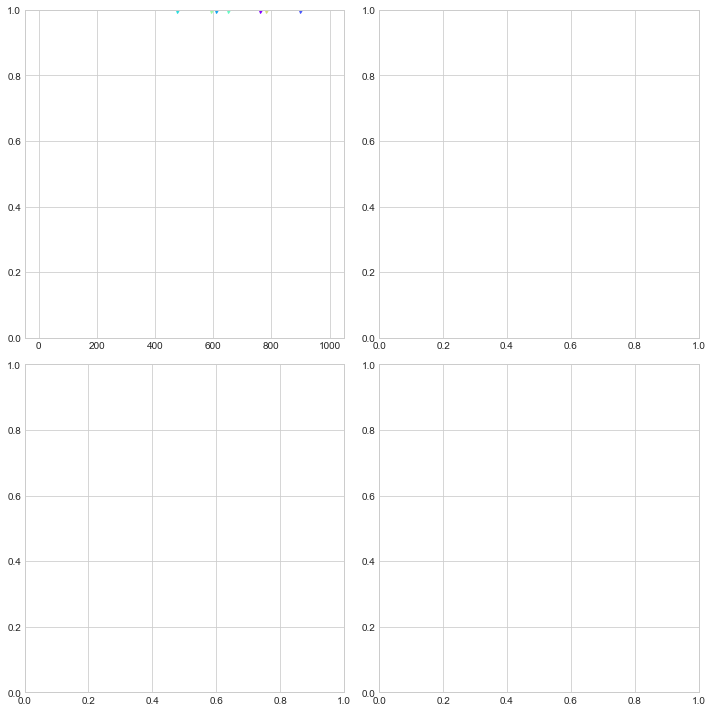

In [35]:
import csv
plt.rcParams["figure.figsize"] = (10,10)
with open('results/labelsentropy_results.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    next(reader, None)  # skip the headers
    pred = list(reader)
with open('results/labelsentropy_results.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    next(reader, None)  # skip the headers
    labels = list(reader)
with open('results/predEntropyentropy_results.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    next(reader, None)  # skip the headers
    entropy = list(reader)

thresholdpoints = findThreshold(pred, labels, entropy, 4,[0,1,2,3,4,5,6,7,8,9], ["main branch","pooling_3","pooling_4","dense_3"],avgAcc=True,graph=True)

print("Threshold Points:")
print(thresholdpoints)

In [3]:
class CrossEntropyEndpoint(keras.layers.Layer):
        def __init__(self, num_outputs, name=None, **kwargs):
            super(CrossEntropyEndpoint, self).__init__(name=name)
            self.num_outputs = num_outputs
#             self.kl = tf.keras.losses.KLDivergence()
            self.loss_fn = keras.losses.CategoricalCrossentropy()
#             self.loss_fn = tf.keras.losses.categorical_crossentropy
            self.evidence = softplus_evidence
#             self.evidence = tf.compat.v1.distributions.Dirichlet
            self.temperature = 10
            self.lmb = 0.005
        def build(self, input_shape):
            self.kernel = self.add_weight("kernel", shape=[int(input_shape[-1]), self.num_outputs])
        
        def get_config(self):
            config = super().get_config().copy()
            config.update({
                'num_outputs': self.num_outputs,
                'name': self.name
            })
            return config

        def call(self, inputs, labels,learning_rate=1):
            outputs = tf.matmul(inputs,self.kernel)
            softmax = tf.nn.softmax(outputs)
            evidence = self.evidence (outputs)
            alpha = evidence + 1
            u = self.num_outputs / tf.reduce_sum(alpha, axis=1, keepdims=True) #uncertainty
          
            prob = alpha/tf.reduce_sum(alpha, 1, keepdims=True) 
            pred = tf.argmax(outputs,1)
            truth = tf.argmax(labels,1)
            match = tf.reshape(tf.cast(tf.equal(pred, truth), tf.float32),(-1,1))
            total_evidence = tf.reduce_sum(evidence,1, keepdims=True)
            mean_succ = tf.reduce_sum(tf.reduce_sum(evidence,1, keepdims=True)*match) / tf.reduce_sum(match+1e-20)
            mean_fail = tf.reduce_sum(tf.reduce_sum(tf.reduce_sum(evidence,1, keepdims=True)*(1-match)) / (tf.reduce_sum(tf.abs(1-match))+1e-20) )
            
            self.add_metric(evidence, name=self.name+"_evidence",aggregation='mean')
            self.add_metric(outputs, name=self.name+"output",aggregation='mean')
            self.add_metric(mean_succ, name=self.name+"_mean_ev_succ",aggregation='mean')
            self.add_metric(mean_fail, name=self.name+"_mean_ev_fail",aggregation='mean')
            
            return outputs

In [6]:

class CrossEntropyEndpoint2(keras.layers.Layer):
    def __init__(self, num_outputs, name=None, **kwargs):
        super(CrossEntropyEndpoint2, self).__init__(name=name)
        self.num_outputs = num_outputs
#             self.kl = tf.keras.losses.KLDivergence()
        self.loss_fn = keras.losses.CategoricalCrossentropy()
#             self.loss_fn = tf.keras.losses.categorical_crossentropy
        self.evidence = evidence_spike
#             self.evidence = tf.compat.v1.distributions.Dirichlet
        self.temperature = 10
        self.lmb = 0.005
    # def build(self, input_shape):
        # self.kernel = self.add_weight("kernel", shape=[int(input_shape[-1]), self.num_outputs])
        # print(self.kernel)
    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'num_outputs': self.num_outputs,
            'name': self.name
        })
        return config

    def call(self, inputs, labels,learning_rate=1):
        # outputs = tf.matmul(inputs,self.kernel)
        outputs = inputs
        # print("endpoint", outputs)
        # outputs = tf.keras.activations.relu(outputs)
        softmax = tf.nn.softmax(outputs)
        evidence = self.evidence (outputs)
        alpha = evidence + 1
        u = self.num_outputs / tf.reduce_sum(alpha, axis=1, keepdims=True) #uncertainty
        
        prob = alpha/tf.reduce_sum(alpha, 1, keepdims=True) 
        pred = tf.argmax(outputs,1)
        truth = tf.argmax(labels,1)
        match = tf.reshape(tf.cast(tf.equal(pred, truth), tf.float32),(-1,1))
        total_evidence = tf.reduce_sum(evidence,1, keepdims=True)
        mean_succ = tf.reduce_sum(tf.reduce_sum(evidence,1, keepdims=True)*match) / tf.reduce_sum(match+1e-20)
        mean_fail = tf.reduce_sum(tf.reduce_sum(tf.reduce_sum(evidence,1, keepdims=True)*(1-match)) / (tf.reduce_sum(tf.abs(1-match))+1e-20) )
        
        self.add_metric(evidence, name=self.name+"_evidence",aggregation='mean')
        self.add_metric(u, name=self.name+"_uncertainty",aggregation='mean')
        self.add_metric(mean_succ, name=self.name+"_mean_ev_succ",aggregation='mean')
        self.add_metric(mean_fail, name=self.name+"_mean_ev_fail",aggregation='mean')
        
        return outputs


In [ ]:
import tensorflow as tf
# model_name = "models/alexNetv6_evidence.hdf5"
# model = tf.keras.models.load_model('../models/alexNetv6_evidence_cross_3b.hdf5', custom_objects={'CrossEntropyEndpoint': CrossEntropyEndpoint,"cross_entropy_evidence":evidence_crossentropy()})
model = tf.keras.models.load_model('../models/alexNetv6_evidence_3_cross_3b.hdf5', custom_objects={'CrossEntropyEndpoint': CrossEntropyEndpoint2,"cross_entropy_evidence":evidence_crossentropy()})
                                                                        

In [51]:
def displayEvidence(model,test_ds):
    num_outputs = len(model.outputs) # the number of output layers for the purpose of providing labels
    predictions = []
    labels = []
    iterator = iter(test_ds)
    print(len(test_ds))
    item = iterator.get_next()
    pClass = []
    predictions=[]
    pEvidence = []
    pUncertainty=[]
    pAcc=[]
    Outputs=[]
    output_names=["branch"]
    # for i in range(len(test_ds)-1):
    for i in range(10):
        print("prediction: {} of {}".format(i,len(test_ds)),end='\r')
        item = iterator.get_next()
#         prediction = model.predict(item[0])
        x = model.test_on_batch(item[0],item[1])
        print(x)
        pClass.append(tf.argmax(item[1],1).numpy()[0])
        pEvidence.append(x[2])
        pAcc.append(x[1])       
        pUncertainty.append(x[3])   
    Predictions = pd.DataFrame({"label":pClass,"evidence":pEvidence,"Acc":pAcc,"uncertainty":pUncertainty, "overlap":0})
    pd.set_option('display.expand_frame_repr', False)
    acc = Predictions.groupby("Acc").count()
    # print("accuracy: {} correct, {} incorrect".format(acc.iloc[0][0],acc.iloc[1][0]))
    mean = Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["evidence"].mean().iloc[0]
    std = Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["evidence"].std().iloc[0]
    E_threshold = Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["evidence"].mean() + Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["evidence"].std()
    if E_threshold.size > 0:
        E_threshold = E_threshold.iloc[0]
    else:
        E_threshold = 0
    # print("evidence Threshold >= correct: ", E_threshold)
    U_threshold = Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["uncertainty"].mean() - Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["uncertainty"].std()
    if U_threshold.size > 0:
        U_threshold = U_threshold.iloc[0]
    else:
        U_threshold = 0
    # print("uncertainty Threshold <= correct: ", U_threshold)
    correct_rows = Predictions.loc[Predictions['Acc'] == True]
    incorrect_rows = Predictions.loc[Predictions['Acc'] == False]
    Incorrects_overlap = Predictions.loc[(Predictions['Acc'] == False)  & (Predictions["evidence"] > E_threshold) & (Predictions["overlap"] == 0)].count().iloc[0]
    # print(Predictions)
    Outputs = Outputs.append(pd.DataFrame({"Branch Name":output_names[0],
                "Accuracy":(acc.iloc[1][0] / (acc.iloc[0][0] +acc.iloc[1][0])),
                "E_Threshold":E_threshold,
                # "Overlap_Threshold":non_overlapping_incorrects_threshold,
                "acceptance_rate":Predictions.loc[(Predictions["evidence"] > E_threshold)].sort_values("evidence").shape[0]/(Predictions.count().iloc[0]),
                "accepted_correct":Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["evidence"] > E_threshold)].sort_values("evidence").shape[0],
                "accepted_incorrect":Predictions.loc[(Predictions['Acc'] == False)  & (Predictions["evidence"] > E_threshold)].sort_values("evidence").shape[0],
                "accepted_accuracy":(Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["evidence"] > E_threshold)].sort_values("evidence").shape[0])/ Predictions.loc[(Predictions["evidence"] > E_threshold)].count()[0],
                "overlap_adjusted_accuracy":(Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["evidence"] > E_threshold)].sort_values("evidence").shape[0] + Incorrects_overlap) / Predictions.loc[(Predictions["evidence"] > E_threshold)].count()[0],
                "rejected_correct":Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["evidence"] < E_threshold)].sort_values("evidence").shape[0],
                "rejected_incorrect":Predictions.loc[(Predictions['Acc'] == False)  & (Predictions["evidence"] < E_threshold)].sort_values("evidence").shape[0],
                "Incorrects_overlap":Incorrects_overlap,
                },index=[1]))
    # print(Predictions)
    print(Outputs)
    print("accuracy: ",Predictions.groupby("Acc").count())
    print("mean",Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["evidence"].mean())
    print("std",Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["evidence"].std())
    E_threshold = Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["evidence"].mean() + Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["evidence"].std()
    E_threshold = E_threshold.iloc[0]
    print("evidence Threshold >= correct: ", E_threshold)
    U_threshold = Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["uncertainty"].mean() - Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["uncertainty"].std()
    U_threshold = U_threshold.iloc[0]
    print("uncertainty Threshold <= correct: ", U_threshold)
    print("Evidence")
    print("Passed correct answers:", Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["evidence"] < E_threshold)].sort_values("evidence").shape)
    print("Accepted incorrect answers", Predictions.loc[(Predictions['Acc'] == False)  & (Predictions["evidence"] > E_threshold)].sort_values("evidence").shape)
    correct_rows = Predictions.loc[Predictions['Acc'] == True]
    incorrect_rows = Predictions.loc[Predictions['Acc'] == False]

    fig, axs = plt.subplots(1, 2)
    
    fig.suptitle('Horizontally stacked subplots')
    axs[0].scatter(correct_rows['label'],correct_rows['evidence'],c ='r',marker='+')
    axs[0].scatter(incorrect_rows['label']+.3,incorrect_rows['evidence'],c ='k',marker='x')
    axs[0].plot(np.repeat(E_threshold,11),'b--')
    axs[0].set_title("evidence")

    fig.set_size_inches(10, 10)
    plt.show()
    return Predictions


10000
[0.8353163003921509, 1.0, 9.931148529052734, 0.09148169308900833, 99.31148529052734, 0.0]
[0.35272249579429626, 1.0, 6.111330986022949, 0.1406206488609314, 61.11330795288086, 0.0]
[1.4392662048339844, 0.0, 5.656388282775879, 0.15023162961006165, 0.0, 56.563880920410156]
[1.3991103172302246, 0.0, 3.8452835083007812, 0.2063862681388855, 0.0, 38.45283508300781]
[0.8964318037033081, 1.0, 2.8512790203094482, 0.2596539855003357, 28.51279067993164, 0.0]
[0.20641592144966125, 1.0, 3.9625420570373535, 0.20150962471961975, 39.62541961669922, 0.0]
[0.8004930019378662, 1.0, 3.1054587364196777, 0.24357818067073822, 31.05458641052246, 0.0]
[1.072417974472046, 1.0, 4.134591102600098, 0.19475746154785156, 41.34591293334961, 0.0]
[0.15711751580238342, 1.0, 6.484083652496338, 0.13361689448356628, 64.84083557128906, 0.0]
[1.4257786273956299, 0.0, 3.5358517169952393, 0.220465749502182, 0.0, 35.358516693115234]
None
accuracy:       label  evidence  uncertainty  overlap
Acc                            

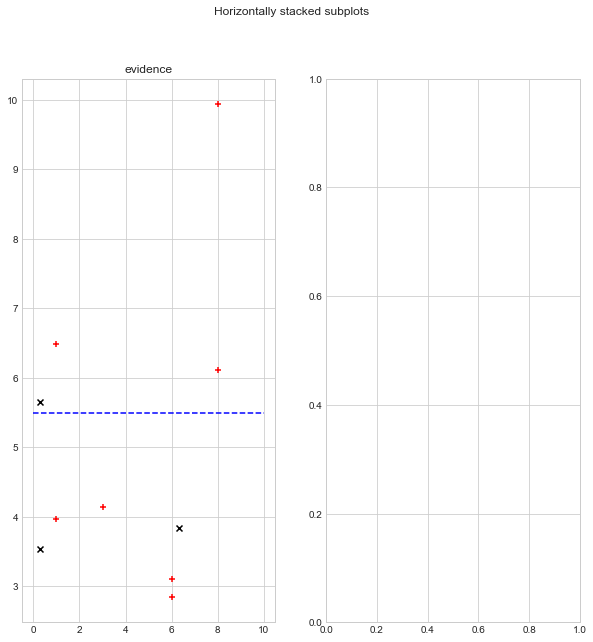

In [52]:
###keras KL activated model 47 epochs
Predictions = displayEvidence(model,test_ds)

In [ ]:
###keras KL activated model 47 epochs
Predictions = displayEvidence(model,test_ds)

In [66]:
def evidence_toCsv(model,test_ds):
    num_outputs = len(model.outputs) # the number of output layers for the purpose of providing labels
    iterator = iter(test_ds)
    print(len(test_ds))
    item = iterator.get_next()
    print(num_outputs)
    pClass = []
    output_names=["main_exit","branch_1","branch_2","branch_3"]
   

    results = []    
    outputs = pd.DataFrame()
    for i in range(len(test_ds)-1):
    # for i in range(10):
        print("prediction: {} of {}".format(i,len(test_ds)),end='\r')
        item = iterator.get_next()
        x = model.test_on_batch(item[0],item[1])
        x.append(tf.argmax(item[1],1).numpy()[0])
        results.append(x)

    outputs = pd.DataFrame(results)
    print(outputs.head())
    outputs.to_csv("checkModel_3results.csv")

evidence_toCsv(model,test_ds)

10000
4
          0         1         2         3         4    5    6    7    8         9   ...        12        13         14        15        16        17         18        19        20  21
0   7.494553  2.531222  0.280860  2.328407  2.354064  0.0  1.0  0.0  0.0  0.007814  ...  0.000000  0.018407 -11.598414  0.181729  0.002337  0.107745 -22.377949  1.077219  0.000234   8
1  11.590896  2.380105  3.465800  2.957931  2.787060  0.0  0.0  0.0  0.0  0.001713  ...  0.017126  0.002859  -8.965656  0.000000  0.028589  0.000009 -19.216381  0.000000  0.000094   8
2   1.817309  1.464558  0.313188  0.037074  0.002489  1.0  1.0  1.0  1.0  0.001372  ...  0.000000  0.010683  -9.196716  0.106828  0.000000  0.007099 -12.584332  0.070992  0.000000   0
3   6.644143  1.832435  2.462207  0.084821  2.264679  1.0  0.0  1.0  0.0  0.016755  ...  0.167554  0.001909 -11.948112  0.019091  0.000000  0.008257 -12.688638  0.000000  0.082573   6
4   1.677280  1.463606  0.190960  0.022213  0.000500  1.0  1.0  1.0  1.0

In [25]:
url='https://raw.githubusercontent.com/python/cpython/3.8/Lib/statistics.py'
import urllib.request 

urllib.request.urlretrieve(url, 'statistics.py')
from statistics import NormalDist

def displayEvidence_branches(model,test_ds, csv = False):
    num_outputs = len(model.outputs) # the number of output layers for the purpose of providing labels
    iterator = iter(test_ds)
    print(len(test_ds))
    item = iterator.get_next()
    print(num_outputs)
    pClass = []
    output_names=["main_exit","branch_1","branch_2","branch_3"]
    predictions=[] # list of dataframe of results for each output
    pEvidence = []
    pUncertainty=[]
    pAcc=[]
    pOverlap =[]
    pOutputs = []
    for i in range(num_outputs):
        pClass.append([])
        predictions.append([])
        pEvidence.append([])
        pUncertainty.append([])
        pAcc.append([])
        pOverlap.append([])
        pOutputs.append([])
    # for i in range(len(test_ds)-1):
    if csv == True:
        import csv
        with open('checkModel_3results.csv', newline='') as f:
            reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
            next(reader)
            results = list(reader)
        for i,x in enumerate(results):
            print("prediction: {} of {}".format(i,len(test_ds)),end='\r')
            x.pop(0) #remove the first element, which is the index from the csv
            pClass[0].append(x[-1])
            pClass[1].append(x[-1])
            pClass[2].append(x[-1])
            pClass[3].append(x[-1])

            pAcc[0].append(x[5])  
            pAcc[1].append(x[6])  
            pAcc[2].append(x[7])  
            pAcc[3].append(x[8])  

            pEvidence[0].append(0)
            pEvidence[1].append(x[9])
            pEvidence[2].append(x[13])
            pEvidence[3].append(x[17])
            '''
            overlap
            if zero, both match, if else they don't match
            TT 1-1 =0
            TF 1-0 =1

            FT 0-1 = -1
            FF 0-0 =0
            
            '''
            pOverlap[0].append(1)
            pOverlap[1].append((x[5] - x[6]))
            pOverlap[2].append((x[5] - x[7]))
            pOverlap[3].append((x[5] - x[8]))

            pUncertainty[0].append(0)
            pUncertainty[1].append(x[10])
            pUncertainty[2].append(x[14])
            pUncertainty[3].append(x[18])
    else:    
        # for i in range(len(test_ds)-1):
        for i in range(10):
            print("prediction: {} of {}".format(i,len(test_ds)),end='\r')
            item = iterator.get_next()
            x = model.test_on_batch(item[0],item[1])
            pred = model.predict(item[0])
            print(pred)
            # print("accuracy:", x[4], "evidence:",x[5], "uncert:",x[6])
            "format should be: loss, dense2_loss, branch_loss,dense2_acc, branch_acc, branch_evid, branch_uncert, branch_mean_avg, branch_mean_succ, branch_mean_fail "
            #always loss at the start,
            # for j in range(num_outputs):
            #     pClass[j].append(tf.argmax(item[1],1).numpy()[0])
            #     # loss = x[j+1]
            #     pAcc[j].append(x[1+num_outputs+j])      
            #     # pEvidence.append(x[5])
            #     # pAcc.append(x[4])       
            #     # pUncertainty.append(x[6])   
            #     if j >0: #the first exit is the main exit, which doesn't care about evidence, If you want to measure the evidence of a single exit model, use displayEvidence()
            #         print("number:",(num_outputs*2)+1 + (j-1 *4))
            #         pEvidence[j].append(x[num_outputs*2+1 + (j-1 *4)])
            #         pUncertainty[j].append(x[num_outputs*2+2+(j-1 * 4)])
            pClass[0].append(tf.argmax(item[1],1).numpy()[0])
            pClass[1].append(tf.argmax(item[1],1).numpy()[0])
            pClass[2].append(tf.argmax(item[1],1).numpy()[0])
            pClass[3].append(tf.argmax(item[1],1).numpy()[0])

            pAcc[0].append(x[5])  
            pAcc[1].append(x[6])  
            pAcc[2].append(x[7])  
            pAcc[3].append(x[8])  

            pEvidence[0].append(0)
            pEvidence[1].append(x[9])
            pEvidence[2].append(x[13])
            pEvidence[3].append(x[17])
            '''
            overlap
            if zero, both match, if else they don't match
            TT 1-1 =0
            TF 1-0 =1

            FT 0-1 = -1
            FF 0-0 =0
            
            '''
            pOverlap[0].append(1)
            pOverlap[1].append((x[5] - x[6]))
            pOverlap[2].append((x[5] - x[7]))
            pOverlap[3].append((x[5] - x[8]))

            pUncertainty[0].append(0)
            pUncertainty[1].append(x[10])
            pUncertainty[2].append(x[14])
            pUncertainty[3].append(x[18])


            pOutputs[0].append(pred[0][0])
            pOutputs[1].append(pred[0][1])
            pOutputs[2].append(pred[0][2])
            pOutputs[3].append(pred[0][3])
            # print("accuracy:",pOverlap[1],pOverlap[2],pOverlap[3])
    
    fig, axs = plt.subplots(1, 3)
    Outputs =pd.DataFrame()
    MainBranch_Outputs = pd.DataFrame()
    baseDist = NormalDist()
    for j in range(num_outputs):
        # print("class ",pClass[j])
        # print("acc ",pAcc[j])
        # print("evid ",pEvidence[j])
        # print("uncert ",pUncertainty[j])
        
        # if pAcc[0] == pAcc[j] :
        #     overlap=1
        # else:
        #     overlap=0

        # "output":pOutputs[j], 
        Predictions = pd.DataFrame({"label":pClass[j],"evidence":pEvidence[j],"Acc":pAcc[j],"uncertainty":pUncertainty[j], "overlap":pOverlap[j]})

        # if j != 0: 
        # print(pOutputs[j])
        # print(Predictions)
       
#     print(pClass)
#     print(pEvidence)
#     print(pAcc)
   
    # print(Predictions)
        pd.set_option('display.expand_frame_repr', False)

        acc = Predictions.groupby("Acc").count()
        # print("accuracy: {} correct, {} incorrect".format(acc.iloc[0][0],acc.iloc[1][0]))
        mean = Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["evidence"].mean().iloc[0]
        std = Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["evidence"].std().iloc[0]

        # if j == 0:
        #     baseDist = NormalDist(mu=mean, sigma=std)
        # # print("mean: {}, std: {}".format(mean,std))
        # NormalDist(mean,std).overlap(baseDist)
        # print("overlap: ", NormalDist)
        # print(Predictions.loc[(Predictions['Acc'] == False) & Predictions["overlap"] == 1])
        # print(Predictions.loc[(Predictions['Acc'] == False) & Predictions["overlap"] == 1].groupby("Acc")["evidence"].std())
        non_overlapping_incorrects_threshold = Predictions.loc[(Predictions['Acc'] == False) & Predictions["overlap"] == 1].groupby("Acc")["evidence"].mean() + Predictions.loc[(Predictions['Acc'] == False) & Predictions["overlap"] == 1].groupby("Acc")["evidence"].std() 
        # overlapping_incorrects = Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["evidence"].mean()
        E_threshold = Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["evidence"].mean() + Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["evidence"].std()
        if E_threshold.size > 0:
            E_threshold = E_threshold.iloc[0]
        else:
            E_threshold = 0
        print('overlap',non_overlapping_incorrects_threshold)
        print('overlap size',non_overlapping_incorrects_threshold.size)
        if non_overlapping_incorrects_threshold.size > 0:
            non_overlapping_incorrects_threshold = non_overlapping_incorrects_threshold.iloc[0]
        else:
            non_overlapping_incorrects_threshold = 0.0


        # print("evidence Threshold >= correct: ", E_threshold)
        U_threshold = Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["uncertainty"].mean() - Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["uncertainty"].std()
        if U_threshold.size > 0:
            U_threshold = U_threshold.iloc[0]
        else:
            U_threshold = 0
            
        # print("uncertainty Threshold <= correct: ", U_threshold)
        correct_rows = Predictions.loc[Predictions['Acc'] == True]
        incorrect_rows = Predictions.loc[Predictions['Acc'] == False]
        Incorrects_overlap = Predictions.loc[(Predictions['Acc'] == False)  & (Predictions["evidence"] > non_overlapping_incorrects_threshold) & (Predictions["overlap"] == 0)].count().iloc[0]
        # print(Predictions)
        Outputs = Outputs.append(pd.DataFrame({"Branch Name":output_names[j],
                    "Accuracy":(acc.iloc[1][0] / (acc.iloc[0][0] +acc.iloc[1][0])),
                    "E_Threshold":E_threshold,
                    "Overlap_Threshold":non_overlapping_incorrects_threshold,
                    "acceptance_rate":Predictions.loc[(Predictions["evidence"] > non_overlapping_incorrects_threshold)].sort_values("evidence").shape[0]/(Predictions.count().iloc[0]),
                    "accepted_correct":Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["evidence"] > non_overlapping_incorrects_threshold)].sort_values("evidence").shape[0],
                    "accepted_incorrect":Predictions.loc[(Predictions['Acc'] == False)  & (Predictions["evidence"] > non_overlapping_incorrects_threshold)].sort_values("evidence").shape[0],
                    "accepted_accuracy":(Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["evidence"] > non_overlapping_incorrects_threshold)].sort_values("evidence").shape[0])/ Predictions.loc[(Predictions["evidence"] > non_overlapping_incorrects_threshold)].count()[0],
                    "overlap_adjusted_accuracy":(Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["evidence"] > non_overlapping_incorrects_threshold)].sort_values("evidence").shape[0] + Incorrects_overlap) / Predictions.loc[(Predictions["evidence"] > non_overlapping_incorrects_threshold)].count()[0],
                    "rejected_correct":Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["evidence"] < non_overlapping_incorrects_threshold)].sort_values("evidence").shape[0],
                    "rejected_incorrect":Predictions.loc[(Predictions['Acc'] == False)  & (Predictions["evidence"] < non_overlapping_incorrects_threshold)].sort_values("evidence").shape[0],
                    "Incorrects_overlap":Incorrects_overlap,
                    },index=[j]))
        
         #don't graph the first output if there are multiple branches. evidence is not measured for the trunk of a branched model.
        if j == 0 and num_outputs > 1:
            continue
        # print(Outputs)
        # print("Uncertainty")
        # print("Passed correct answers:", Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["uncertainty"] >U_threshold)].sort_values("uncertainty").shape)
        # print("Accepted incorrect answers", Predictions.loc[(Predictions['Acc'] == False)  & (Predictions["uncertainty"] < U_threshold)].sort_values("uncertainty").shape)

        # print("Evidence")
        # print("Passed correct answers:", Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["evidence"] < E_threshold)].sort_values("evidence").shape)
        # print("Accepted incorrect answers", Predictions.loc[(Predictions['Acc'] == False)  & (Predictions["evidence"] > E_threshold)].sort_values("evidence").shape)
    
       

        
        fig.suptitle('Alexnet branch performance')
        axs[j-1].scatter(correct_rows['label'],correct_rows['evidence'],c ='r',marker='+')
        axs[j-1].scatter(incorrect_rows['label']+.3,incorrect_rows['evidence'],c ='k',marker='x')
        axs[j-1].plot(np.repeat(E_threshold,11),'b--')
        axs[j-1].plot(np.repeat(non_overlapping_incorrects_threshold,11),'g--')
        if j == 0:
            axs[j-1].title.set_text("main exit: {}")    
        else:
            axs[j-1].title.set_text("branch: {}".format([j]))

        # axs[round(int(j/2)), round(j%2)].scatter(correct_rows['label'],correct_rows['evidence'],c ='r',marker='+')
        # axs[round(int(j/2)), round(j%2)].scatter(incorrect_rows['label']+.3,incorrect_rows['evidence'],c ='k',marker='x')
        # axs[round(int(j/2)), round(j%2)].plot(np.repeat(E_threshold,11),'b--')
        # if j == 0:
        #     axs[round(int(j/2)), round(j%2)].title.set_text("main exit: {}")    
        # else:
        #     axs[round(int(j/2)), round(j%2)].title.set_text("branch: {}".format([j]))
        # axs[round(int(j/2)), round(j%2)].set_title("exit ",j)

    # axs[1].scatter(correct_rows['label'],correct_rows['uncertainty'],c ='r',marker='+')
    # axs[1].scatter(incorrect_rows['label']+.3,incorrect_rows['uncertainty'],c ='k',marker='x')
    # axs[1].plot(np.repeat(U_threshold,11),'b--')

    # axs[1].set_title("uncertainty")
    print(Outputs)
    fig.set_size_inches(15, 10)
    fig.text(0.5, 0.09, 'Label Class #', ha='center', va='center')
    fig.text(0.09, 0.5, 'Evidence Score', ha='center', va='center', rotation='vertical')
    plt.show()
    return Predictions


In [26]:
###keras KL activated model 47 epochs
Predictions = displayEvidence_branches(model,test_ds,False)


'''
Single Branch saving equation is:
    (AcceptRate * Branch_cost/Trunk_cost) + (1 - AcceptRate)
Multiple Branch Saving equation is:
    for branches n:
    (AcceptRate_n * Branch_cost_n/Trunk_cost) + (1 - sum of AcceptRate_n)
    .... 
    need to account for the reduce number of inputs to the second branch.


first branch:
    acceptance rate * total_inputs  = 0.25 * 10,000 = 2,500
    branch saving = (2500 * normal_cost) - (2500 * branch_cost) 

Since a branch accepting a false input that the trunk also gets wrong is essentially inconsquential, 
    The effective accuracy rate of a branch is the total_correct + overlaping_false / total_inputs
    Note: this number seems to be very very small, it is only the most outlying of outliers present in both classifiers



'''

10000
1
[[17.023407  18.317297   9.635992   4.468814   5.401026   1.4947214
   4.2016854  4.4135084 18.352053  15.757741 ]]


IndexError: list index out of range

In [35]:
# In the above graph each exit missed a suprisingly similar number of incorrect answers, 
# I assume this is essentially the outliers that the model has a hard time differentiating between.
# Since I'm using the avg + std here to draw a line, they are elements who's evidence is beyond one std deviation from the mean for incorrect answers
# next thing would be to a statistic of which ones the main exit also missed, and how the threshold did at capturing that.
# I could have a second threshold based on the std deviation of that subset of missed items that the main layer didn't miss. 
# for the chapter I will put forward 3 different thresholding methods 1. std deviation of missed inputs, 2. class based std deviation, 3. std deviation of the misses that the main layer got right.
# to do this further, I should do a test where I split the test set in 2 and get a comparision result on the unseen test results for the threshold.
# I can also do a test on how it goes if I build a threshold based on its performance on the validation data, does this generate a threshold similar or different
# to that of the test set.
'''
For a 1% approx drop in accuracy, I'm getting a 37% saving in processing cost.
'''


"\nFor a 1% approx drop in accuracy, I'm getting a 37% saving in processing cost.\n"

10000
zero
0, main_exit mean: 1.155937889251256, std: 0.6832197457618576, threshold inf
1, branch 1 mean: 0.8729230440348377, std: 0.5908586828781213, threshold 0.2820643611567164
2, branch 2 mean: 0.6062402657487657, std: 0.5297194591522818, threshold 0.07652080659648386
3, branch 3 mean: 0.634280483346122, std: 0.5719109982029982, threshold 0.06236948514312379


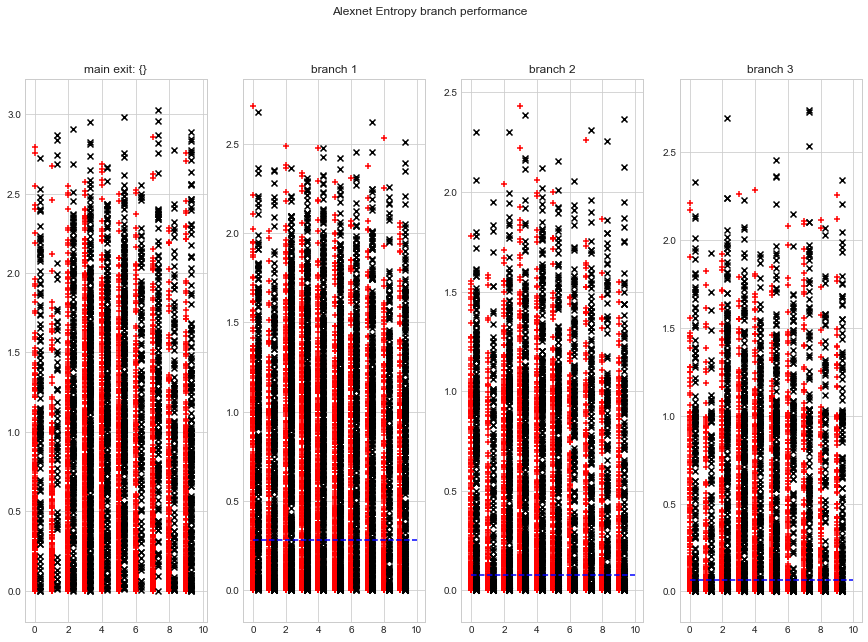

Name  Accuracy  Correct  Incorrect  E_Threshold  acceptance_rate  \
0  main_exit  0.793979     7939       2060          inf         0.000000   
1   branch 1  0.606361     6063       3936     0.282064         0.549455   
2   branch 2  0.734473     7344       2655     0.076521         0.414141   
3   branch 3  0.804780     8047       1952     0.062369         0.326833   

   accepted_correct  accepted_incorrect  accepted_accuracy  rejected_correct  \
0              7939                2060           0.793979                 0   
1              3635                 870           0.806881              2428   
2              5246                 612           0.895527              2098   
3              6287                 444           0.934037              1760   

   rejected_incorrect  Incorrects_overlap  
0                   0                2060  
1                3066                 870  
2                2043                 612  
3                1508                 444

In [58]:
def calcEntropy_Tensors(y_hat):
        #entropy is the sum of y * log(y) for all possible labels.
        #log(0) is evaulated as NAN and then clipped to approaching zero
        #rank is used to reduce multi-dim arrays but leave alone 1d arrays.
        rank = tf.rank(y_hat)
        def calc_E(y_hat):
            results = tf.clip_by_value((tf.math.log(y_hat)/tf.math.log(tf.constant(2, dtype=y_hat.dtype))), -1e12, 1e12)
#             results = tf.clip_by_value(results, -1e12, 1e12)
#             print("res ", results)
            return tf.reduce_sum(y_hat * results)

        sumEntropies = (tf.map_fn(calc_E,tf.cast(y_hat,'float')))
        
        if rank == 1:
            sumEntropies = tf.reduce_sum(sumEntropies)
        return -sumEntropies

    
def displayEntropy(model,test_ds):
    output_names =["main_exit",'branch 1','branch 2','branch 3']
    num_outputs = len(model.outputs) # the number of output layers for the purpose of providing labels
#     train_ds, test_ds, validation_ds = (dataset)
    predictions = []
    labels = []
    iterator = iter(test_ds)
    print(len(test_ds))
    item = iterator.get_next()
#     print(item)

    pClass = []
    predictions=[]
    pUncertainty=[]
    pEntropy = []
    pAcc=[]
    pOverlap=[]
    for i in range(num_outputs):
        pClass.append([])
        predictions.append([])
        pEntropy.append([])
        pUncertainty.append([])
        pAcc.append([])
        pOverlap.append([])
    
   
      
    for i in range(len(test_ds)-1):
    # for i in range(100):
        print("prediction: {} of {}".format(i,len(test_ds)),end='\r')
        item = iterator.get_next()
#         prediction = model.predict(item[0])
        x = model.predict(item[0])[0]
        # print(x)
#         print("accuracy:", x[1], "evidence:",x[2])
        # pClass.append(tf.argmax(item[1],1).numpy()[0])
#         pEvidence.append(x[2])
        for j in range(num_outputs):
            
            result = x[j]
            # print("j=",j,result)

            pClass[j].append(tf.argmax(item[1],1).numpy()[0])
            # print(tf.nn.softmax(result[0]),1)
            softmax = tf.nn.softmax(result[0])
            
            # print(softmax)
            # print("argmax",tf.argmax(softmax))
            # print("label",item[1], tf.argmax(item[1],1))
            if tf.argmax(softmax) == tf.argmax(item[1],1):
                pAcc[j].append(1)
                # pOverlap[j] = abs(pAcc[0][-1]-1)
            else:
                pAcc[j].append(0)
                # pOverlap[j] = abs(pAcc[0][-1]-0)
            pOverlap[j] = 0
            

            if j == 0:
                pEntropy[j].append(calcEntropy_Tensors((result)).numpy()[0])
            else:
                pEntropy[j].append(calcEntropy_Tensors(tf.nn.softmax(result)).numpy()[0])

    fig, axs = plt.subplots(1, 4)
    # print(pEntropy)

    Outputs =pd.DataFrame()

    for j in range(num_outputs):   
        Predictions = pd.DataFrame({"label":pClass[j], "Acc":pAcc[j], "entropy":pEntropy[j],"overlap":pOverlap[j]})
        acc = Predictions.groupby("Acc").count()

        #### the avg + std entropy threshold

        # print("accuracy: {} correct, {} incorrect".format(acc.iloc[0][0],acc.iloc[1][0]))
        mean = Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["entropy"].mean().iloc[0]
        std = Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["entropy"].std().iloc[0]
        E_threshold = mean - std
        # E_threshold = tf.maximum(0,E_threshold)
        if j == 0:
            print("zero")
            E_threshold = math.inf
        print("{}, {} mean: {}, std: {}, threshold {}".format(j, output_names[j], mean,std,E_threshold))

        # print("evidence Threshold >= correct: ", E_threshold)
        # U_threshold = Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["uncertainty"].mean() - Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["uncertainty"].std()
        # if U_threshold.size > 0:
        #     U_threshold = U_threshold.iloc[0]
        # else:
        #     U_threshold = 0
            
        # print("uncertainty Threshold <= correct: ", U_threshold)
        correct_rows = Predictions.loc[Predictions['Acc'] == True]
        incorrect_rows = Predictions.loc[Predictions['Acc'] == False]
        # print("correct", correct_rows)

        Outputs = Outputs.append(pd.DataFrame({"Name":output_names[j],
                    "Accuracy":(acc.iloc[1][0] / (acc.iloc[0][0] +acc.iloc[1][0])),
                    "Correct":len(correct_rows.index),
                    "Incorrect":len(incorrect_rows.index),
                    "E_Threshold":E_threshold,
        #             "U_Threshold":U_threshold,
                    "acceptance_rate":Predictions.loc[(Predictions["entropy"] >= E_threshold)].sort_values("entropy").shape[0]/(Predictions.count().iloc[0]),
                    "accepted_correct":Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["entropy"] <= E_threshold)].sort_values("entropy").shape[0],
                    "accepted_incorrect":Predictions.loc[(Predictions['Acc'] == False)  & (Predictions["entropy"] <= E_threshold)].sort_values("entropy").shape[0],
                    # "accepted_accuracy":(Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["entropy"] <= E_threshold)].sort_values("entropy").shape[0] + Predictions.loc[(Predictions['Acc'] == False)  & (Predictions["entropy"] >= E_threshold) & (Predictions["overlap"] == 0)].count().iloc[0]) / Predictions.loc[(Predictions["entropy"] >= E_threshold)].count()[0],
                    "accepted_accuracy":(Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["entropy"] <= E_threshold)].sort_values("entropy").shape[0]) / Predictions.loc[(Predictions["entropy"] <= E_threshold)].count()[0],
                                        #  & (Predictions["overlap"] == 0)].count().iloc[0]) 

                    "rejected_correct":Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["entropy"] > E_threshold)].sort_values("entropy").shape[0],
                    "rejected_incorrect":Predictions.loc[(Predictions['Acc'] == False)  & (Predictions["entropy"] > E_threshold)].sort_values("entropy").shape[0],
                    "Incorrects_overlap":Predictions.loc[(Predictions['Acc'] == False)  & (Predictions["entropy"] <= E_threshold) & (Predictions["overlap"] == 0)].count().iloc[0],
                    },index=[j]))


        correct_rows = Predictions.loc[Predictions['Acc'] == True]
        incorrect_rows = Predictions.loc[Predictions['Acc'] == False]

     
        
        fig.suptitle('Alexnet Entropy branch performance')
        axs[j].scatter(correct_rows['label'],correct_rows['entropy'],c ='r',marker='+')
        axs[j].scatter(incorrect_rows['label']+.3,incorrect_rows['entropy'],c ='k',marker='x')
        axs[j].plot(np.repeat(E_threshold,11),'b--')
        if j == 0:
            axs[j].title.set_text("main exit: {}")    
        else:
            axs[j].title.set_text("{}".format(output_names[j]))

#     axs[1].scatter(correct_rows['label'],correct_rows['uncertainty'],c ='r',marker='+')
#     axs[1].scatter(incorrect_rows['label']+.3,incorrect_rows['uncertainty'],c ='k',marker='x')
#     axs[1].plot(np.repeat(U_threshold,11),'b--')


    fig.set_size_inches(15, 10)
    plt.show()
    return Outputs


displayEntropy(model,test_ds)


In [ ]:

def displayEntropy_fromcsv(model,test_ds):
    output_names =["main_exit",'branch 1','branch 2','branch 3']
    num_outputs = len(model.outputs) # the number of output layers for the purpose of providing labels
    predictions = []
    labels = []
    iterator = iter(test_ds)
    print(len(test_ds))
    item = iterator.get_next()
#     print(item)
    import csv

    with open('results/labels_alt8_1.csv', newline='') as f:
        reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
        next(reader)
        labels = list(reader)
    with open('results/predClasses_alt8_1.csv', newline='') as f:
        reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
        next(reader)
        pred = list(reader)
    with open('results/predEntropy_alt8_1.csv', newline='') as f:
        reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
        next(reader)
        entropy = list(reader)

    pClass = []
    predictions=[]
    pUncertainty=[]
    pEntropy = []
    pAcc=[]
    pOverlap=[]
    for i in range(num_outputs):
        pClass.append([])
        predictions.append([])
        pEntropy.append([])
        pUncertainty.append([])
        pAcc.append([])
        pOverlap.append([])
    
   
    ### open csv 

    # for i in range(len(test_ds)-1):
    for i in range(100):
        print("prediction: {} of {}".format(i,len(test_ds)),end='\r')
        item = iterator.get_next()
#         prediction = model.predict(item[0])
        x = model.predict(item[0])[0]
        for j in range(num_outputs):
            
            result = x[j]
            pClass[j].append(tf.argmax(item[1],1).numpy()[0])
            # print(tf.nn.softmax(result[0]),1)
            softmax = tf.nn.softmax(result[0])
            
            # print("label",item[1], tf.argmax(item[1],1))
            if tf.argmax(softmax) == tf.argmax(item[1],1):
                pAcc[j].append(1)
                # pOverlap[j] = abs(pAcc[0][-1]-1)
            else:
                pAcc[j].append(0)
                # pOverlap[j] = abs(pAcc[0][-1]-0)
            pOverlap[j] = 0

            if j == 0:
                pEntropy[j].append(calcEntropy_Tensors((result)).numpy()[0])
            else:
                pEntropy[j].append(calcEntropy_Tensors(tf.nn.softmax(result)).numpy()[0])

    fig, axs = plt.subplots(1, 4)
    # print(pEntropy)

    Outputs =pd.DataFrame()

    for j in range(num_outputs):   
        Predictions = pd.DataFrame({"label":pClass[j], "Acc":pAcc[j], "entropy":pEntropy[j],"overlap":pOverlap[j]})
        acc = Predictions.groupby("Acc").count()

        #### the avg + std entropy threshold

        # print("accuracy: {} correct, {} incorrect".format(acc.iloc[0][0],acc.iloc[1][0]))
        mean = Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["entropy"].mean().iloc[0]
        std = Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["entropy"].std().iloc[0]
        E_threshold = mean - std
        # E_threshold = tf.maximum(0,E_threshold)
        if j == 0:
            print("zero")
            E_threshold = math.inf
        print("{}, {} mean: {}, std: {}, threshold {}".format(j, output_names[j], mean,std,E_threshold))
        correct_rows = Predictions.loc[Predictions['Acc'] == True]
        incorrect_rows = Predictions.loc[Predictions['Acc'] == False]
        # print("correct", correct_rows)

        Outputs = Outputs.append(pd.DataFrame({"Name":output_names[j],
                    "Accuracy":(acc.iloc[1][0] / (acc.iloc[0][0] +acc.iloc[1][0])),
                    "Correct":len(correct_rows.index),
                    "Incorrect":len(incorrect_rows.index),
                    "E_Threshold":E_threshold,
        #             "U_Threshold":U_threshold,
                    "acceptance_rate":Predictions.loc[(Predictions["entropy"] >= E_threshold)].sort_values("entropy").shape[0]/(Predictions.count().iloc[0]),
                    "accepted_correct":Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["entropy"] <= E_threshold)].sort_values("entropy").shape[0],
                    "accepted_incorrect":Predictions.loc[(Predictions['Acc'] == False)  & (Predictions["entropy"] <= E_threshold)].sort_values("entropy").shape[0],
                    # "accepted_accuracy":(Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["entropy"] <= E_threshold)].sort_values("entropy").shape[0] + Predictions.loc[(Predictions['Acc'] == False)  & (Predictions["entropy"] >= E_threshold) & (Predictions["overlap"] == 0)].count().iloc[0]) / Predictions.loc[(Predictions["entropy"] >= E_threshold)].count()[0],
                    "accepted_accuracy":(Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["entropy"] <= E_threshold)].sort_values("entropy").shape[0]) / Predictions.loc[(Predictions["entropy"] <= E_threshold)].count()[0],
                                        #  & (Predictions["overlap"] == 0)].count().iloc[0]) 

                    "rejected_correct":Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["entropy"] > E_threshold)].sort_values("entropy").shape[0],
                    "rejected_incorrect":Predictions.loc[(Predictions['Acc'] == False)  & (Predictions["entropy"] > E_threshold)].sort_values("entropy").shape[0],
                    "Incorrects_overlap":Predictions.loc[(Predictions['Acc'] == False)  & (Predictions["entropy"] <= E_threshold) & (Predictions["overlap"] == 0)].count().iloc[0],
                    },index=[j]))


        correct_rows = Predictions.loc[Predictions['Acc'] == True]
        incorrect_rows = Predictions.loc[Predictions['Acc'] == False]
        
        fig.suptitle('Alexnet Entropy branch performance')
        axs[j].scatter(correct_rows['label'],correct_rows['entropy'],c ='r',marker='+')
        axs[j].scatter(incorrect_rows['label']+.3,incorrect_rows['entropy'],c ='k',marker='x')
        axs[j].plot(np.repeat(E_threshold,11),'b--')
        if j == 0:
            axs[j].title.set_text("main exit: {}")    
        else:
            axs[j].title.set_text("{}".format(output_names[j]))
    fig.set_size_inches(15, 10)
    plt.show()
    return Outputs


displayEntropy(model,test_ds)

In [5]:
def displayInternal(model,test_ds):
    num_outputs = len(model.outputs) # the number of output layers for the purpose of providing labels
#     train_ds, test_ds, validation_ds = (dataset)
    predictions = []
    labels = []
    iterator = iter(test_ds)
    print(len(test_ds))
    item = iterator.get_next()
#     print(item)

    pClass = []
    predictions=[]
    pEvidence = []
    pUncertainty=[]
    pAcc=[]
    # for i in range(len(test_ds)-1):
    for i in range(10):
        print("prediction: {} of {}".format(i,len(test_ds)),end='\r')
        item = iterator.get_next()
#         prediction = model.predict(item[0])
        x = model.predict(item[0])
        print("outputs: ",x)
        print("evidence: {}".format(softplus_evidence(x)))
        print("selu evidence: {}".format(tf.reduce_sum(tf.keras.activations.elu(x,2))))
        print(tf.reduce_sum(softplus_evidence(x)))
        print("label:{} == {} ".format(tf.argmax(tf.nn.softmax(x),1),tf.argmax(item[1],1)))
       
    return Predictions


In [ ]:
Predictions = displayInternal(x,test_ds)

10000
accuracy:            label  evidence  uncertainty
Acc                                   
0.000000    538       538          538
0.372672      1         1            1
1.000000    461       461          461
mean Acc
0.0    0.048442
Name: evidence, dtype: float64
std Acc
0.0    0.031116
Name: evidence, dtype: float64
evidence Threshold >= correct:  0.07955792273711126
uncertainty Threshold <= correct:  -5.262491442444456
Evidence
Passed correct answers: (342, 4)
Accepted incorrect answers (69, 4)


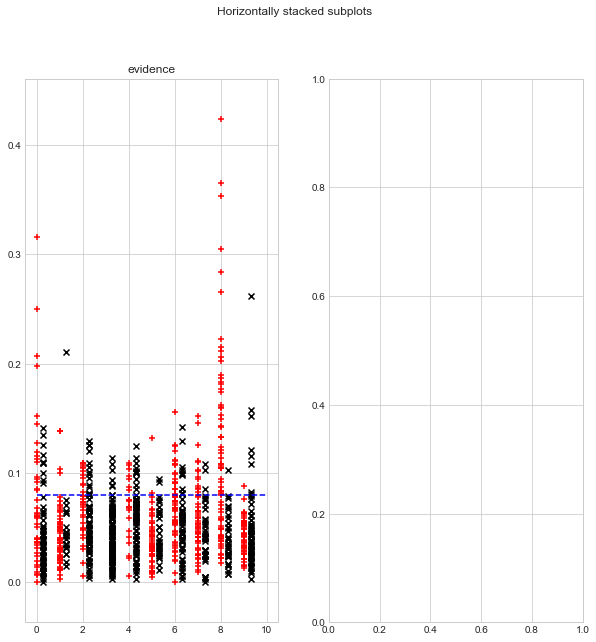

In [12]:
###keras KL activated model 47 epochs
Predictions = displayEvidence(model,test_ds)

In [16]:
ar = [1,2,3,4,5,6,7,8,9,10]
ar = [1,1,1,1,1,1,1,1,1,10]
ar = [0,0,0,0,0,0,0,0,1,10]
print(np.mean(ar))

Predictions.to_csv("predictions_softplus_trained.csv")


1.1


In [ ]:
 print(Predictions.loc[(Predictions['Acc'] == True) & (Predictions['evidence']==0)])

In [ ]:
print(Predictions.groupby("Acc").count())
print(Predictions.groupby("Acc").mean())
print(Predictions.groupby("Acc").std())
E_threshold = Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["evidence"].mean() + Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["evidence"].std()
E_threshold = E_threshold.iloc[0]
print("evidence Threshold >= correct: ", E_threshold)
U_threshold = Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["uncertainty"].mean() - Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["uncertainty"].std()
U_threshold = U_threshold.iloc[0]
print("uncertainty Threshold <= correct: ", U_threshold)

print("Uncertainty")
print("Passed correct answers:", Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["uncertainty"] >=U_threshold)].sort_values("uncertainty").shape)
print("Accepted incorrect answers", Predictions.loc[(Predictions['Acc'] == False)  & (Predictions["uncertainty"] < U_threshold)].sort_values("uncertainty").shape)

print("Evidence")
print("Passed correct answers:", Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["evidence"] <= E_threshold)].sort_values("evidence").shape)
print("Accepted incorrect answers", Predictions.loc[(Predictions['Acc'] == False)  & (Predictions["evidence"] > E_threshold)].sort_values("evidence").shape)

fig, axs = plt.subplots(1, 2)
    
correct_rows = Predictions.loc[Predictions['Acc'] == True]
incorrect_rows = Predictions.loc[Predictions['Acc'] == False]


E_correct_rows_missed = Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["evidence"] <= E_threshold)].sort_values("evidence")
E_incorrect_rows_accepted = Predictions.loc[(Predictions['Acc'] == False)  & (Predictions["evidence"] > E_threshold)].sort_values("evidence")


U_correct_rows_missed = Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["uncertainty"] >=U_threshold)].sort_values("uncertainty")
U_incorrect_rows_accepted = Predictions.loc[(Predictions['Acc'] == False)  & (Predictions["uncertainty"] < U_threshold)].sort_values("uncertainty")

fig.suptitle('Horizontally stacked subplots')
axs[0].scatter(correct_rows['label'],correct_rows['evidence'],c ='r',marker='+')
axs[0].scatter(U_correct_rows_missed['label']-.2,U_correct_rows_missed['evidence'],c ='g',marker='+')
axs[0].scatter(incorrect_rows['label']+.3,incorrect_rows['evidence'],c ='k',marker='x')
axs[0].scatter(U_incorrect_rows_accepted['label']+.3,U_incorrect_rows_accepted['evidence'],c ='b',marker='x')
axs[0].plot(np.repeat(E_threshold,11),'b--')
axs[0].set_title("evidence")

axs[1].scatter(correct_rows['label'],correct_rows['uncertainty'],c ='r',marker='+')
axs[1].scatter(E_correct_rows_missed['label'],E_correct_rows_missed['uncertainty'],c ='g',marker='+')
axs[1].scatter(incorrect_rows['label']+.3,incorrect_rows['uncertainty'],c ='k',marker='x')
axs[1].scatter(E_incorrect_rows_accepted['label']+.3,E_incorrect_rows_accepted['uncertainty'],c ='b',marker='x')
axs[1].plot(np.repeat(U_threshold,11),'b--')

axs[1].set_title("uncertainty")

fig.set_size_inches(10, 10)
plt.show()